In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [74]:
datasets = pd.read_csv('titanic/train.csv')
datasets = datasets.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
trainLabels = datasets['Survived'].values
train = datasets.drop(['Survived'], axis=1)
train = train.values
datasetsTest = pd.read_csv('titanic/test.csv')
test = datasetsTest.drop(['PassengerId', 'Name', 'Ticket'], axis=1).values

In [75]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
train[:, 2:3] = imputer.fit_transform(train[:, 2:3])
test[:, 2:3] = imputer.transform(test[:, 2:3])
imputer_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
train[:, 5:6] = imputer_1.fit_transform(train[:, 5:6])
test[:, 5:6] = imputer_1.transform(test[:, 5:6])
train[:, -1] = ['C' if type(x) == float and math.isnan(x) else x for x in train[:, 7]]
test[:, -1] = ['C' if type(x) == float and math.isnan(x) else x for x in test[:, 7]]
for i in range(0, train.shape[0]):
    if type(train[i][6]) == float and math.isnan(train[i][6]):
        train[i][6] = 'L'
    else:
        train[i][6] = train[i][6][0]
        
for i in range(0, test.shape[0]):
    if type(test[i][6]) == float and math.isnan(test[i][6]):
        test[i][6] = 'L'
    else:
        test[i][6] = test[i][6][0]

In [76]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[:, 1] = labelencoder.fit_transform(train[:, 1])
test[:, 1] = labelencoder.transform(test[:, 1])
labelencoder_1 = LabelEncoder()
train[:, 7] = labelencoder_1.fit_transform(train[:, 7])
test[:, 7] = labelencoder_1.transform(test[:, 7])
labelencoder_2 = LabelEncoder()
train[:, 6] = labelencoder_2.fit_transform(train[:, 6])
test[:, 6] = labelencoder_2.transform(test[:, 6])
train = pd.DataFrame(train)
test = pd.DataFrame(test)
data = pd.get_dummies(train[7])
dataTest = pd.get_dummies(test[7])
data_1 = pd.get_dummies(train[6])
data_1Test = pd.get_dummies(test[6])
data = data.drop([0], axis=1)
dataTest = dataTest.drop([0], axis=1)
data_1 = data_1.drop([0], axis=1)
# data_1Test = data_1Test.drop([0], axis=1)
train = pd.concat([train, data, data_1], axis=1)
test = pd.concat([test, dataTest, data_1Test], axis=1)
train = train.drop([6, 7], axis=1)
test = test.drop([6, 7], axis=1)
train = train.values
test = test.values

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(train)
X_test = pca.transform(test)
explained_ratio = pca.explained_variance_ratio_

In [78]:
X_train = np.column_stack((X_train, trainLabels))

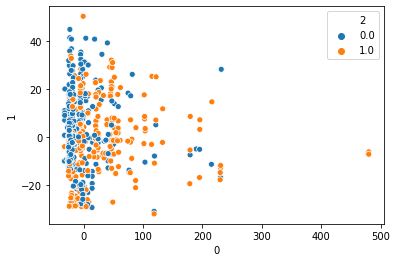

In [79]:
X_train = pd.DataFrame(X_train)
sns.scatterplot(x=0, y=1, data=X_train, hue=2)

In [60]:
# print(np.isnan(test))
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(train, trainLabels)
X_test = lda.transform(test)

In [61]:
X_train = np.column_stack((X_train, trainLabels))
X_train = pd.DataFrame(X_train)

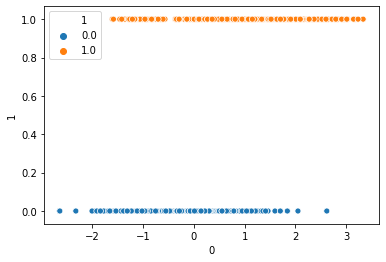

In [62]:
sns.scatterplot(x=0, y=1, data=X_train, hue=1)

In [80]:
X_train = X_train.drop([1], axis=1).values
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, trainLabels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
Passenger = datasetsTest['PassengerId']
y_pred = pd.Series(y_pred, name='Survived')
submission = pd.concat([Passenger, y_pred], axis=1)

In [84]:
submission.to_csv("titanic/titanicSubmission.csv",index=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


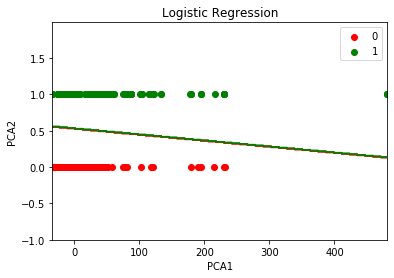

In [81]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, trainLabels
x1, x2 = np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop= x_set[:, 0].max() + 1, step= 0.01),
                     np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max() + 1, step= 0.01))
plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap= ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()